In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

In [17]:
dataset = pd.read_csv("week2.csv")
dataset['Date'] = dataset['Date'].astype(dtype = 'datetime64')
dataset.set_index(['Date'],inplace = True)

<IPython.core.display.Javascript object>


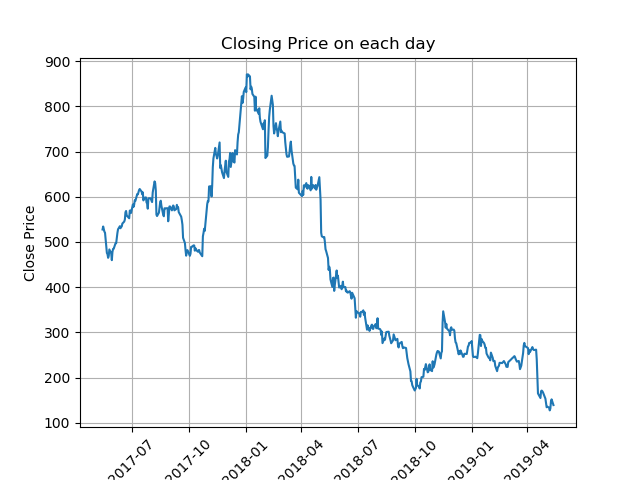

In [18]:
plt.figure()
plt.plot(dataset.index,dataset['Close Price'])
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Closing Price on each day')
plt.grid(True,axis = 'both')
plt.show()

<IPython.core.display.Javascript object>


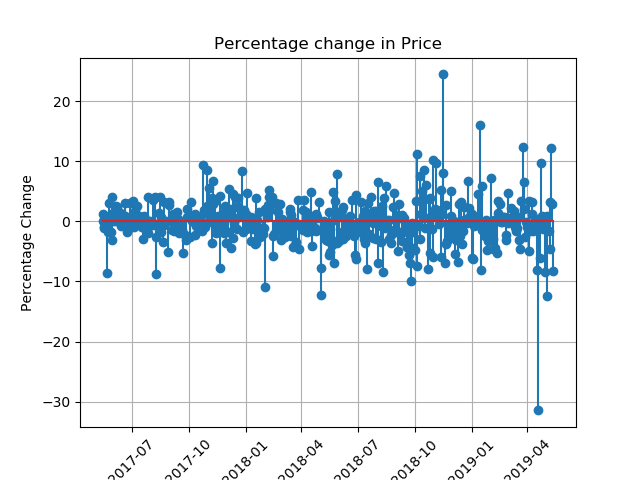

In [7]:
plt.figure()
plt.stem(dataset.index,dataset['Day_Prec_Change'])
plt.ylabel('Percentage Change')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Percentage change in Price')
plt.grid(True,axis = 'both')
plt.show()

<IPython.core.display.Javascript object>


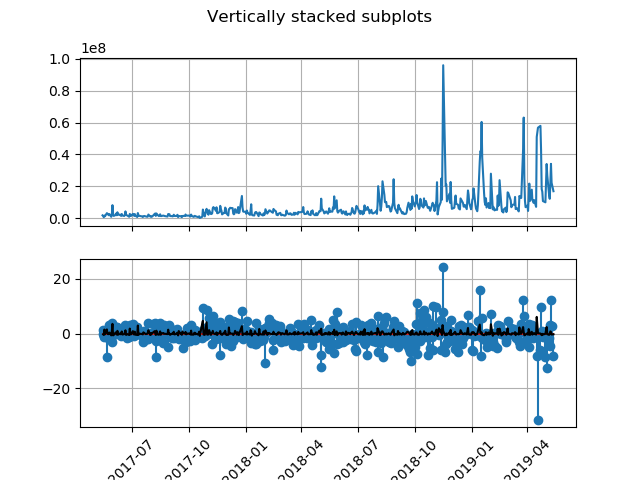

In [19]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True)
fig.suptitle('Vertically stacked subplots')
ax1.grid(True,axis='both')
ax1.plot(dataset.index,dataset['Total Traded Quantity'])
ax2.grid(True,axis='both')
ax2.stem(dataset.index,dataset['Day_Prec_Change'])
ax2.plot(dataset.index,dataset['Total Traded Quantity'].pct_change(),color = 'black')
plt.xticks(rotation = 45)
plt.show()

In [6]:
"""THe change in the volume was higher on the days when the percentage change in the """

'THe change in the volume was higher on the days when the percentage change in the '

<IPython.core.display.Javascript object>


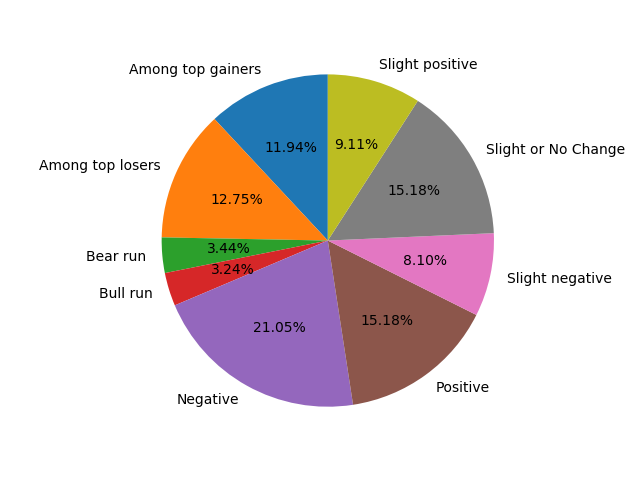

In [20]:
dataset['Trend Occurence'] = np.ones(len(dataset))
_ = dataset[['Trend Occurence','Trend']].groupby('Trend').sum()/len(dataset)*100
sizes = _['Trend Occurence']
labels = _.index
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.show()
dataset.drop(['Trend Occurence'],axis = 1,inplace = True)
del(_)

<IPython.core.display.Javascript object>


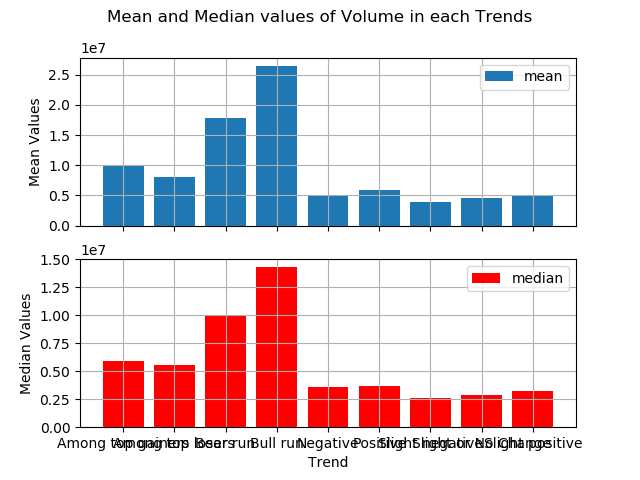

In [21]:
fig1, (ax2,ax3) = plt.subplots(2,sharex = True)
fig1.suptitle("Mean and Median values of Volume in each Trends")
ax2.grid(True , axis = 'both')
ax3.grid(True , axis = 'both')
_ = dataset[['Trend','Total Traded Quantity']].groupby('Trend').mean()
ax2.bar(_.index,_['Total Traded Quantity'],label = "mean") 
_ = dataset[['Trend','Total Traded Quantity']].groupby('Trend').median()
ax3.bar(_.index,_['Total Traded Quantity'],color = 'red',label = "median") 
ax2.legend()
ax3.legend()
plt.xlabel("Trend")
ax2.set(ylabel ="Mean Values")
ax3.set(ylabel ="Median Values")
plt.show()
del(_)

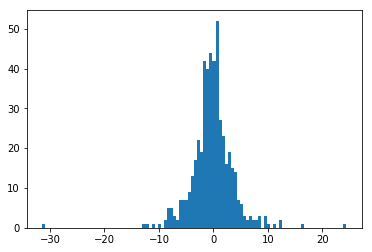

In [9]:
plt.figure()
plt.hist(dataset['Day_Prec_Change'],bins = 100)
plt.show()

In [22]:
df1 = pd.read_csv('Small_Cap/IDFC.csv')
df1 = df1[df1.Series == 'EQ']
df1.set_index(['Date'],inplace = True)

In [23]:
df2 = pd.read_csv('Small_Cap/FORTIS.csv')
df2 = df2[df2.Series == 'EQ']
df2.set_index(['Date'],inplace = True)

In [24]:
df3 = pd.read_csv('Small_Cap/NCC.csv')
df3 = df3[df3.Series == 'EQ']
df3.set_index(['Date'],inplace = True)

In [25]:
df4 = pd.read_csv('Small_Cap/PVR.csv')
df4 = df4[df4.Series == 'EQ']
df4.set_index(['Date'],inplace = True)

In [26]:
df5 = pd.read_csv('Small_Cap/RCOM.csv')
df5 = df5[df5.Series == 'EQ']
df5.set_index(['Date'],inplace = True)

In [27]:
Close_Price_df = pd.DataFrame({'IDFC':df1['Close Price'],'FORTIS':df2['Close Price'],
                               'NCC':df3['Close Price'],'PVR':df4['Close Price'],'RCOM':df5['Close Price']})

<IPython.core.display.Javascript object>


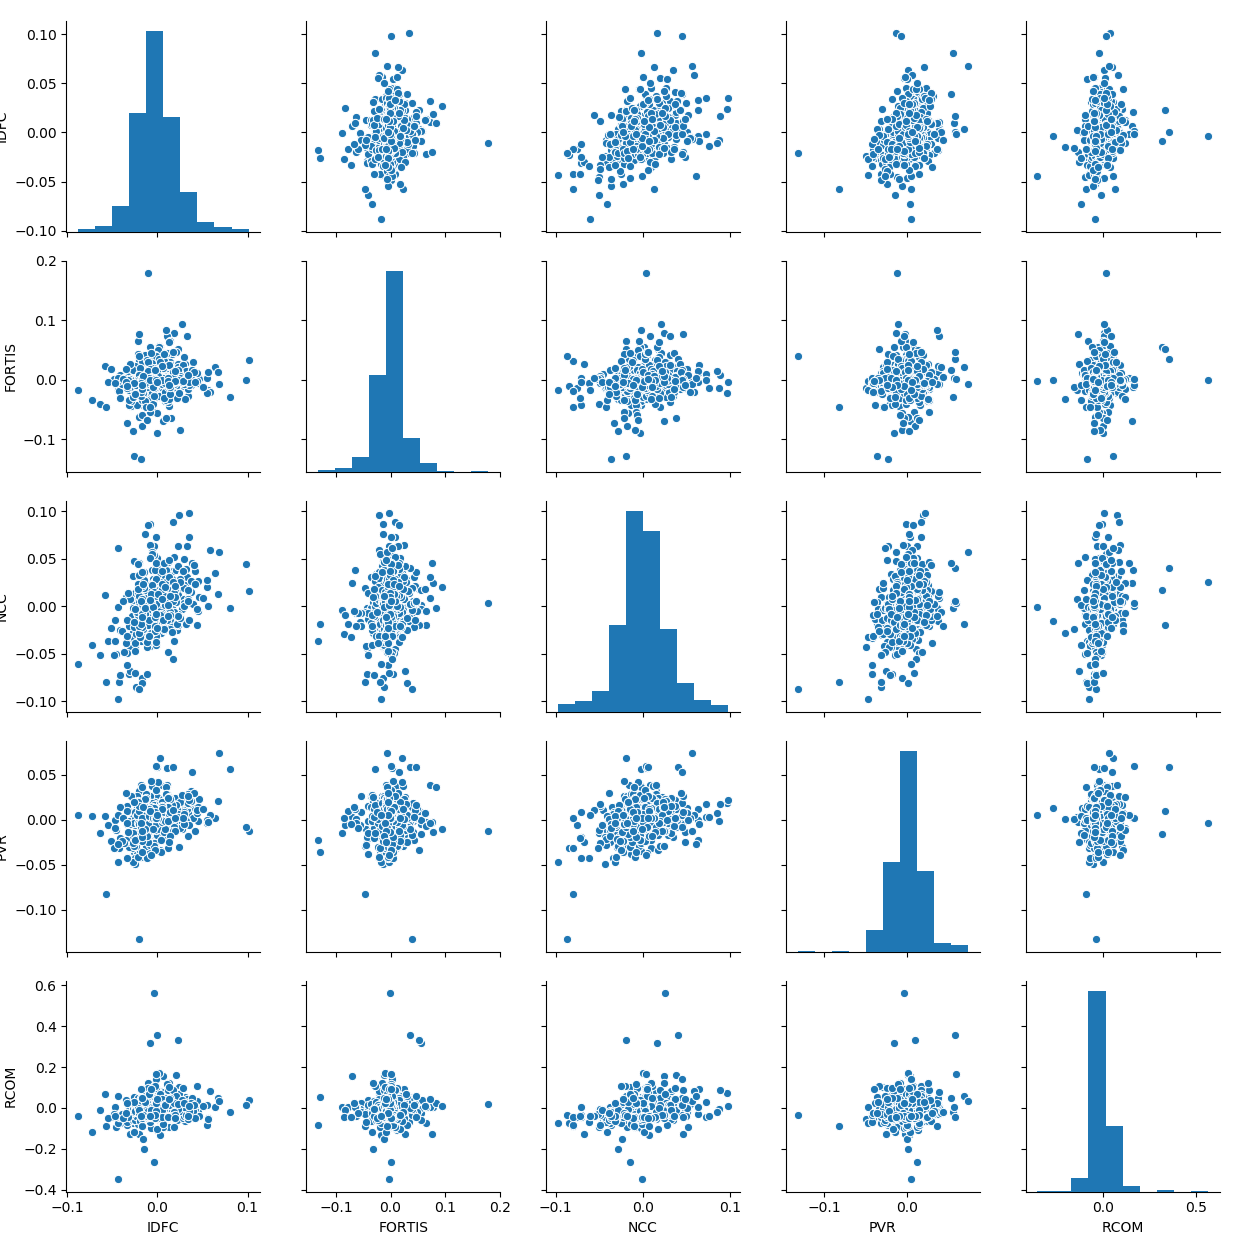

In [40]:
sns.pairplot(Percent_Close_price_df)

<IPython.core.display.Javascript object>


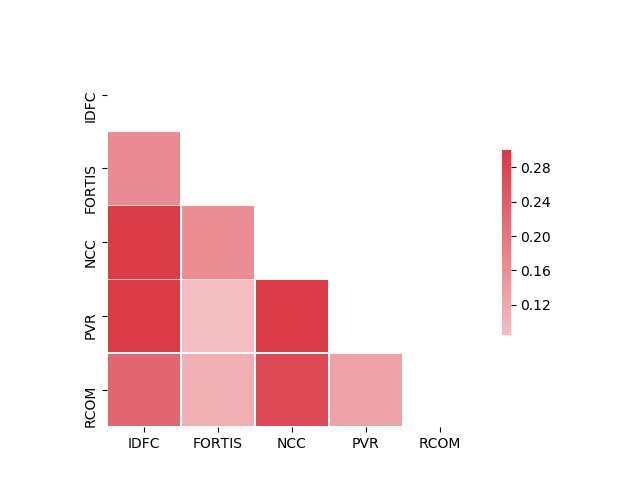

In [44]:
corr = Percent_Close_price_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
Percent_Close_price_df = Close_Price_df.pct_change()
Percent_Close_price_df.dropna(inplace = True)
